In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
% matplotlib inline


importing data.

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Train_Data.csv to Train_Data.csv


In [ ]:
data_train= pd.read_csv('Train_Data.csv')
data_train.head()
data_train.shape

(4571, 9)

converting values to integers for impression, clicks ,cost, conversion , revenue

In [ ]:
data_train['impressions']=pd.to_numeric(data_train['impressions'])
data_train['clicks']=pd.to_numeric(data_train['clicks'])
data_train['cost']=pd.to_numeric(data_train['cost'])
data_train['conversions']=pd.to_numeric(data_train['conversions'])
data_train['revenue']=pd.to_numeric(data_train['revenue'])

Encoding features like date, campaign,adgroup, ad.

In [ ]:
from sklearn.preprocessing import LabelEncoder
data_train['date']=LabelEncoder().fit_transform(data_train['date'])
data_train['adgroup']=LabelEncoder().fit_transform(data_train['adgroup'])
data_train['campaign']=LabelEncoder().fit_transform(data_train['campaign'])
data_train['ad']=LabelEncoder().fit_transform(data_train['ad'])
data_train.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2,0,0,0,24,6,0.08,0,0.00
1,2,0,1,0,1,0,0.00,0,0.00
2,2,0,2,0,13,4,0.04,0,0.00
3,2,0,3,0,5,4,0.08,0,0.00
4,2,0,0,11,247,126,1.29,4,925.71


# Visualization

individual plot

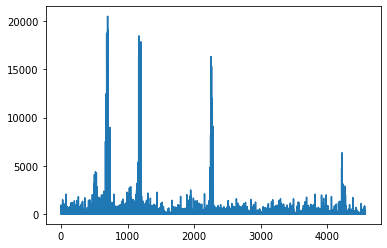

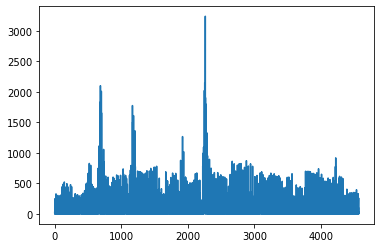

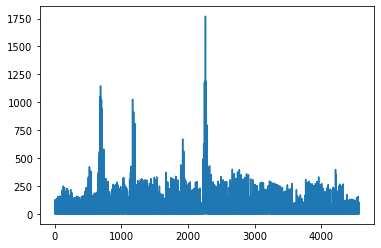

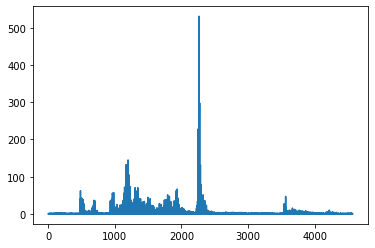

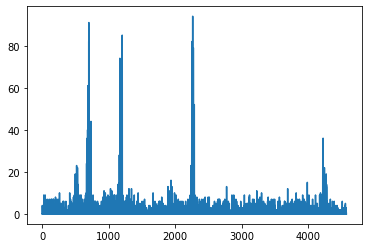

In [ ]:
plt.plot(data_train['revenue'])
plt.show()
plt.plot(data_train['impressions'])
plt.show()
plt.plot(data_train['clicks'])
plt.show()
plt.plot(data_train['cost'])
plt.show()
plt.plot(data_train['conversions'])
plt.show()

Remove data with with revenue greater than 1650 as outlier.

In [ ]:
data_train=data_train[data_train['revenue']<1750]
data_train=data_train[data_train['impressions']<2050]
data_train=data_train[data_train['conversions']<80]


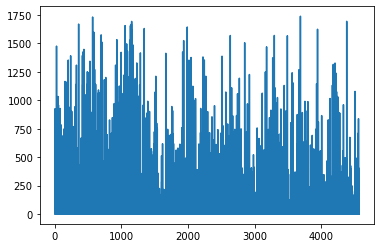

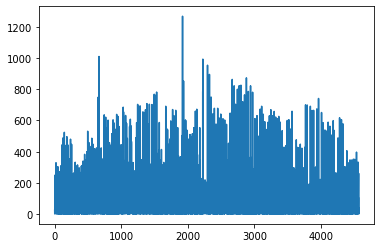

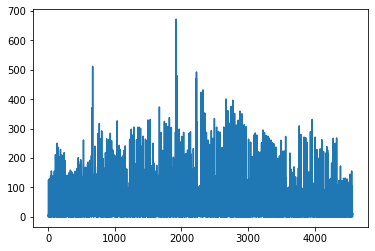

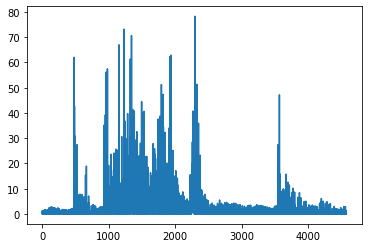

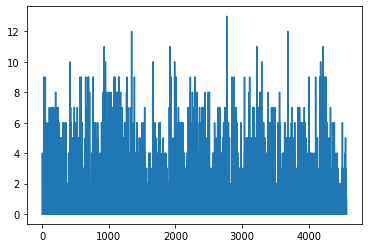

In [ ]:
plt.plot(data_train['revenue'])
plt.show()
plt.plot(data_train['impressions'])
plt.show()
plt.plot(data_train['clicks'])
plt.show()
plt.plot(data_train['cost'])
plt.show()
plt.plot(data_train['conversions'])
plt.show()

heatmap

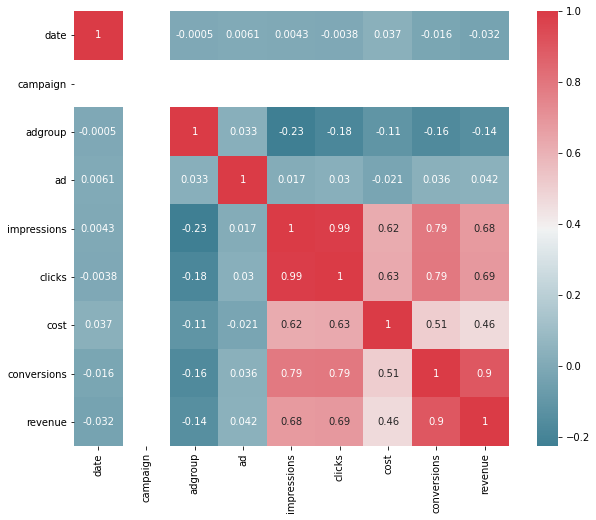

In [ ]:
import seaborn as sns
f, ax= plt.subplots(figsize=(10,8))
corr= data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True,
            ax=ax, annot=True)
plt.show()


In [ ]:
data_train=data_train.drop(["campaign"],axis=1)
data_train.head()

,date,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2,0,0,24,6,0.08,0,0.00
1,2,1,0,1,0,0.00,0,0.00
2,2,2,0,13,4,0.04,0,0.00
3,2,3,0,5,4,0.08,0,0.00
4,2,0,11,247,126,1.29,4,925.71


splitting data

In [ ]:
Y_train= pd.DataFrame(data=data_train.iloc[:,7].values, columns=['target'])
data_train.head()

,date,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2,0,0,24,6,0.08,0,0.00
1,2,1,0,1,0,0.00,0,0.00
2,2,2,0,13,4,0.04,0,0.00
3,2,3,0,5,4,0.08,0,0.00
4,2,0,11,247,126,1.29,4,925.71


In [ ]:
data_train=data_train.drop(["revenue"],axis=1)


In [ ]:
data_train.head()

,date,adgroup,ad,impressions,clicks,cost,conversions
0,2,0,0,24,6,0.08,0
1,2,1,0,1,0,0.00,0
2,2,2,0,13,4,0.04,0
3,2,3,0,5,4,0.08,0
4,2,0,11,247,126,1.29,4


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data_train, Y_train, test_size=0.05, random_state=42)
X_train.shape

(4245, 7)

Normalize data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

Evalution metrics

In [ ]:
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction= model_name.predict(X_test)
  print('MeanAbsoluteError:', metrics.mean_absolute_error(y_test, prediction))
  print('MeanSquaredError:', metrics.mean_squared_error(y_test, prediction))
  print('RootMeanSquareError:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

TRAINING Different Models.

In [ ]:
# linear Regression.
from sklearn import linear_model
linear_regression= linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

MeanAbsoluteError: 72.91956431726574
MeanSquaredError: 29504.72301386604
RootMeanSquareError: 171.76938904783367


In [ ]:
# Decision Tree Regressor.
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

MeanAbsoluteError: 46.18799107142858
MeanSquaredError: 15335.11380580357
RootMeanSquareError: 123.8350265708518


In [ ]:
# Random forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators=200
max_depth=25
min_samples_split=15
min_samples_leaf=2
random_forest= RandomForestRegressor(n_estimators= n_estimators, max_depth=max_depth, min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train, y_train)
print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


MeanAbsoluteError: 52.900605076657335
MeanSquaredError: 16742.42093409673
RootMeanSquareError: 129.39250725639693


In [ ]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor=SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, supportvector_regressor)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MeanAbsoluteError: 82.20182190884609
MeanSquaredError: 50742.08065006009
RootMeanSquareError: 225.2600289666591


Artificial NEURAL network

In [ ]:
import keras
from keras.layers import  Dense
ann=keras.models.Sequential([
                             Dense(6, activation='relu',
                                   input_shape= X_train.shape[1:]),
                             Dense(6,activation='relu'),
                             Dense(1)

])

In [ ]:
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer, loss=loss, metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train, epochs=100)

Epoch 1/100
133/133 [==============================] - 14s 1ms/step - loss: 87999.0568 - mean_squared_error: 87999.0568
Epoch 2/100
133/133 [==============================] - 0s 1ms/step - loss: 93977.2655 - mean_squared_error: 93977.2655
Epoch 3/100
133/133 [==============================] - 0s 1ms/step - loss: 87725.3241 - mean_squared_error: 87725.3241
Epoch 4/100
133/133 [==============================] - 0s 1ms/step - loss: 78202.9721 - mean_squared_error: 78202.9721
Epoch 5/100
133/133 [==============================] - 0s 1ms/step - loss: 84766.8057 - mean_squared_error: 84766.8057
Epoch 6/100
133/133 [==============================] - 0s 1ms/step - loss: 75664.4449 - mean_squared_error: 75664.4449
Epoch 7/100
133/133 [==============================] - 0s 1ms/step - loss: 77682.1589 - mean_squared_error: 77682.1589
Epoch 8/100
133/133 [==============================] - 0s 1ms/step - loss: 73685.6550 - mean_squared_error: 73685.6550
Epoch 9/100
133/133 [==========================

In [ ]:
ann.summary()
print_error(X_test,y_test, ann)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
MeanAbsoluteError: 73.54334578523678
MeanSquaredError: 26753.8284060205
RootMeanSquareError: 163.56597569794428


Saving scikit and keras models

In [ ]:
# Saving Scikit models
import joblib
joblib.dump(linear_regression, "Capstone_Project.pkl")

['Capstone_Project.pkl']

In [ ]:
#  Saving Keras ANN
ann.save('ann_Capstone_Project.h5')

# now fetching new test data set and predicting it


In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Test_Data.csv to Test_Data.csv


In [ ]:
new_test_data= pd.read_csv("Test_Data.csv")

In [ ]:
print(new_test_data.head())
new_test_data.shape

         date    campaign    adgroup  ... impressions  clicks  conversions
0  01-03-2021  campaign 1  adgroup 1  ...         121      49            1
1  01-03-2021  campaign 1  adgroup 3  ...          22      12            0
2  01-03-2021  campaign 1  adgroup 4  ...           5       3            0
3  01-03-2021  campaign 1  adgroup 2  ...           2       1            0
4  01-03-2021  campaign 1  adgroup 2  ...           3       1            0

[5 rows x 8 columns]


(318, 8)

In [ ]:
new_test_data['impressions']=pd.to_numeric(new_test_data['impressions'])
new_test_data['clicks']=pd.to_numeric(new_test_data['clicks'])
new_test_data['cost']=pd.to_numeric(new_test_data['cost'])
new_test_data['conversions']=pd.to_numeric(new_test_data['conversions'])


In [ ]:
new_test_data.shape

(318, 8)

In [ ]:
from sklearn.preprocessing import LabelEncoder
new_test_data['date']=LabelEncoder().fit_transform(new_test_data['date'])
new_test_data['adgroup']=LabelEncoder().fit_transform(new_test_data['adgroup'])
new_test_data['campaign']=LabelEncoder().fit_transform(new_test_data['campaign'])
new_test_data['ad']=LabelEncoder().fit_transform(new_test_data['ad'])
new_test_data.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,0,0,0,0,0.58,121,49,1
1,0,0,2,0,0.17,22,12,0
2,0,0,3,0,0.05,5,3,0
3,0,0,1,0,0.01,2,1,0
4,0,0,1,2,0.01,3,1,0


In [ ]:
new_test_data=new_test_data.drop(["campaign"],axis=1)
new_test_data.head()

,date,adgroup,ad,cost,impressions,clicks,conversions
0,0,0,0,0.58,121,49,1
1,0,2,0,0.17,22,12,0
2,0,3,0,0.05,5,3,0
3,0,1,0,0.01,2,1,0
4,0,1,2,0.01,3,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
new_test_data=scaler.fit_transform(new_test_data)

In [ ]:
target= decision_tree.predict(new_test_data)

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
# res.index = new_test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["revenue"]

# To download the csv file locally
from google.colab import files
res.to_csv('new_test_data.csv', index=False)         
files.download('new_test_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>